# 2017 Chicago Crime Data Analysis

The City of Chicago makes available through its Data Portal (data.cityofchicago.org) access to government data. The site hosts over 200 datasets presented in easy-to-use formats about City departments, services, facilities and performance.

The dataset used in this analysis contains crime reports from 2001 to present date but filtered to consider just occurrences of January and February of 2017.

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data

Disclaimer: This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.

You are a data scientist helping the City of Chicago makes sense of the data collected in order to find important patterns about how to improve law enforcement actions to prevent crime.

Your analysis must be able to address the following requests:

1. What are the top 12 most common crimes of the period?
2. What are the crime types that have median above 50 crimes/day?
3. For each crime type identified in the last question, use the latitude and longitude into a KDE plot, to analyse its spread.
4. For each crime type plotted into KDE, discover the mean of the coordinates (latitude and longitude).
5. Go to google maps, plot the coordinates and investigate if the distances are close or not, what could indicate that the area should have more investment in public security.


In [7]:
# Import packages needed to perform the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# read the dataset
df=pd.read_csv('Chicago_Crime.csv')

In [9]:
# explore the dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10887077,JA196832,01/01/2017 12:01:00 AM,073XX N OAKLEY AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,49,2,20,NaN,NaN,2017,03/23/2017 03:53:53 PM,NaN,NaN,NaN
1,10883971,JA193683,01/01/2017 12:01:00 AM,0000X E 103RD PL,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,9,49,02,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
2,10883969,JA193696,01/01/2017 12:01:00 AM,075XX S KINGSTON AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,False,False,...,7,43,20,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
3,10878960,JA188281,01/01/2017 12:01:00 AM,009XX E 86TH ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,8,44,02,NaN,NaN,2017,03/17/2017 03:52:20 PM,NaN,NaN,NaN
4,10878804,JA187911,01/01/2017 12:01:00 AM,053XX N SHERIDAN RD,1195,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,APARTMENT,False,False,...,48,77,11,NaN,NaN,2017,03/16/2017 03:53:03 PM,NaN,NaN,NaN


In [10]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39065 entries, 0 to 39064
Data columns (total 22 columns):
ID                      39065 non-null int64
Case Number             39065 non-null object
Date                    39065 non-null object
Block                   39065 non-null object
IUCR                    39065 non-null object
Primary Type            39065 non-null object
Description             39065 non-null object
Location Description    38948 non-null object
Arrest                  39065 non-null bool
Domestic                39065 non-null bool
Beat                    39065 non-null int64
District                39065 non-null int64
Ward                    39065 non-null int64
Community Area          39065 non-null int64
FBI Code                39065 non-null object
X Coordinate            38292 non-null float64
Y Coordinate            38292 non-null float64
Year                    39065 non-null int64
Updated On              39065 non-null object
Latitude                3

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,39065.0,1.080743e+07,541147.890628,2.305900e+04,1.081895e+07,1.083481e+07,1.084974e+07,1.088999e+07
Beat,39065.0,1.159020e+03,696.580344,1.110000e+02,6.130000e+02,1.033000e+03,1.722000e+03,2.535000e+03
District,39065.0,1.136183e+01,6.959032,1.000000e+00,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,39065.0,2.313332e+01,14.027629,1.000000e+00,1.000000e+01,2.400000e+01,3.400000e+01,5.000000e+01
Community Area,39065.0,3.679662e+01,21.404500,1.000000e+00,2.300000e+01,3.100000e+01,5.500000e+01,7.700000e+01
X Coordinate,38292.0,1.164413e+06,16170.294287,1.094231e+06,1.152698e+06,1.165977e+06,1.176327e+06,1.204911e+06
Y Coordinate,38292.0,1.886645e+06,31285.098188,1.813925e+06,1.859284e+06,1.894172e+06,1.909566e+06,1.951493e+06
Year,39065.0,2.017000e+03,0.000000,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03
Latitude,38292.0,4.184455e+01,0.086036,4.164461e+01,4.176919e+01,4.186543e+01,4.190754e+01,4.202254e+01
Longitude,38292.0,-8.767216e+01,0.058865,-8.792891e+01,-8.771467e+01,-8.766621e+01,-8.762855e+01,-8.752527e+01


In [13]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [14]:
df.isnull().sum()                  # check for null values

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    117
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate            773
Y Coordinate            773
Year                      0
Updated On                0
Latitude                773
Longitude               773
Location                773
dtype: int64

In [15]:
# Drop lines containing missing values
df.dropna(inplace=True, axis=0)

In [16]:
# Convert the Date column to a datetime format, not considering the time
df['Date'] = pd.to_datetime(df['Date'].str[0:10], format='%m/%d/%Y')

In [17]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                   int64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [18]:
# Make the Primary Type column categorical
df['Primary Type'] = df['Primary Type'].astype("category")

In [19]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                  category
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                   int64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## 1. What are the top 12 most common crimes of the period?

In [20]:
df['Primary Type'].value_counts()                # NO of records for each crime

THEFT                                8834
BATTERY                              6730
CRIMINAL DAMAGE                      4328
OTHER OFFENSE                        2764
ASSAULT                              2577
DECEPTIVE PRACTICE                   2331
BURGLARY                             2163
MOTOR VEHICLE THEFT                  2012
ROBBERY                              1820
NARCOTICS                            1483
CRIMINAL TRESPASS                    1067
WEAPONS VIOLATION                     647
OFFENSE INVOLVING CHILDREN            293
PUBLIC PEACE VIOLATION                212
CRIM SEXUAL ASSAULT                   210
INTERFERENCE WITH PUBLIC OFFICER      168
PROSTITUTION                          135
SEX OFFENSE                           114
HOMICIDE                               98
ARSON                                  73
STALKING                               29
LIQUOR LAW VIOLATION                   28
INTIMIDATION                           23
KIDNAPPING                        

In [21]:
# from the above result we can identify the top 12 crimes



# Answer
THEFT                                
BATTERY                              
CRIMINAL DAMAGE                      
OTHER OFFENSE                        
ASSAULT                              
DECEPTIVE PRACTICE                   
BURGLARY                             
MOTOR VEHICLE THEFT                  
ROBBERY                              
NARCOTICS                            
CRIMINAL TRESPASS                    
WEAPONS VIOLATION                     

In [22]:
# Another method
# Create a new dataframe gr_by_crime_type
gr_by_crime_type = df[['Primary Type', 'Block']].groupby('Primary Type').agg('count')
gr_by_crime_type.reset_index(inplace=True)
gr_by_crime_type.columns = ['CrimeType', 'Quantity']

In [23]:
# Sort the data by quantity in descending order
gr_by_crime_type.sort_values(by='Quantity', ascending=False, inplace = True)

In [24]:
# Subset the top 12 crimes
top_12_crimes = gr_by_crime_type['CrimeType'][0:12]
top_12_crimes

28                  THEFT
2                 BATTERY
6         CRIMINAL DAMAGE
21          OTHER OFFENSE
1                 ASSAULT
8      DECEPTIVE PRACTICE
3                BURGLARY
15    MOTOR VEHICLE THEFT
25                ROBBERY
16              NARCOTICS
7       CRIMINAL TRESPASS
29      WEAPONS VIOLATION
Name: CrimeType, dtype: category
Categories (30, object): [ARSON, ASSAULT, BATTERY, BURGLARY, ..., SEX OFFENSE, STALKING, THEFT, WEAPONS VIOLATION]

## Question 2: What are the crime types that have median above 50 crimes/day?

In [25]:
# Create a new dataframe grouped by day
grp_by_day = df[['Primary Type', 'Date', 'Block']].groupby(['Primary Type', 'Date']).agg('count')

In [26]:
grp_by_day.reset_index(inplace=True)


In [27]:
grp_by_day.columns = ['CrimeType', 'Date', 'Quantity']


In [28]:
# Filter just the top 12 crimes
grp_by_day = grp_by_day[grp_by_day.CrimeType.isin(top_12_crimes)]

In [29]:
# Explore the new data set
grp_by_day.CrimeType.unique()

[ASSAULT, BATTERY, BURGLARY, CRIMINAL DAMAGE, CRIMINAL TRESPASS, ..., NARCOTICS, OTHER OFFENSE, ROBBERY, THEFT, WEAPONS VIOLATION]
Length: 12
Categories (12, object): [ASSAULT, BATTERY, BURGLARY, CRIMINAL DAMAGE, ..., OTHER OFFENSE, ROBBERY, THEFT, WEAPONS VIOLATION]

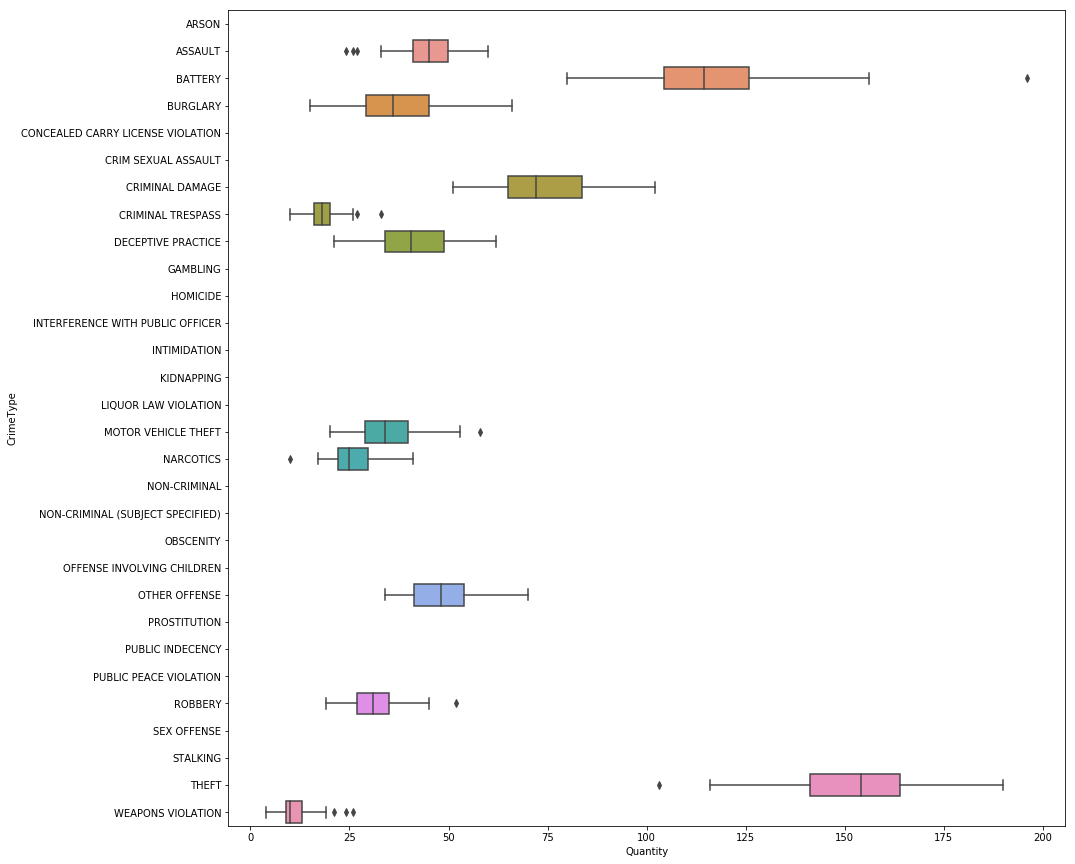

In [30]:
# Plot the boxplot
plt.figure(figsize=(15,15))
g = sns.boxplot(data=grp_by_day, y='CrimeType', x = 'Quantity')
plt.xticks(rotation=0)
plt.show()

we could see from the plot, the three categories with more than 50 crimes/day are: **THEFT**, **BATTERY** and **CRIMINAL DAMAGE**.

## Question 3: For each crime type identified in the last question, use the latitude and longitude into a KDE plot, to analyse its spread.

In [31]:
# Create new datasets for theft, battery, criminal_damage
theft = df[['Latitude','Longitude']][df['Primary Type'] == 'THEFT']
battery = df[['Latitude','Longitude']][df['Primary Type'] == 'BATTERY']
criminal_damage = df[['Latitude','Longitude']][df['Primary Type'] == 'CRIMINAL DAMAGE']

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


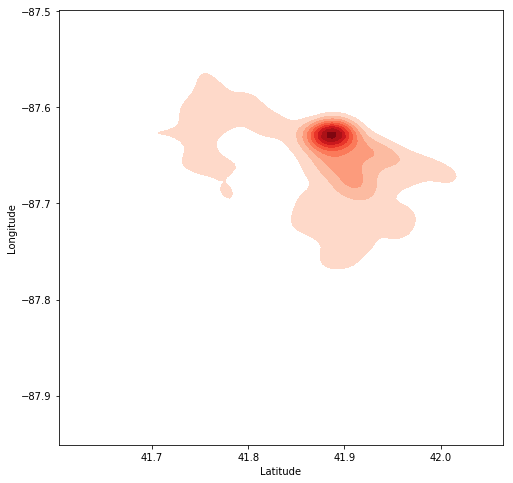

In [32]:
# Plot the THEFT crimes in red
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(theft.Latitude, theft.Longitude, cmap="Reds", shade=True, shade_lowest=False)

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


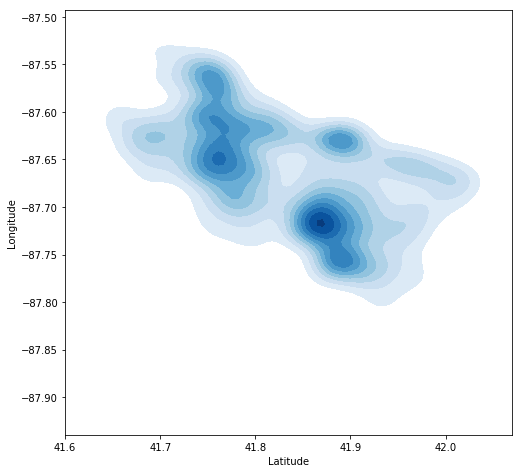

In [33]:
# Plot the BATTERY crimes in blue
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(battery.Latitude, battery.Longitude, cmap="Blues", shade=True, shade_lowest=False)

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


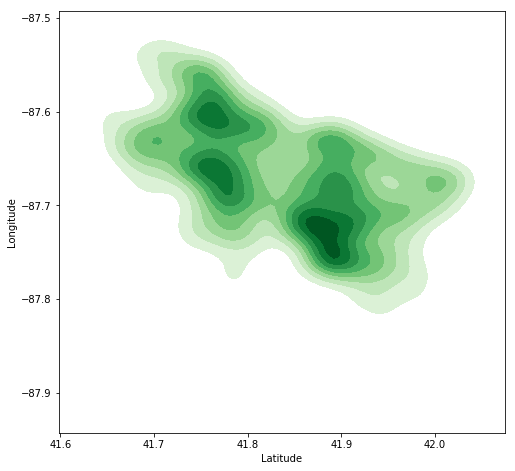

In [34]:
# Plot the CRIMINAL DAMAGE crimes in green
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(criminal_damage.Latitude, criminal_damage.Longitude, cmap="Greens", shade=True, shade_lowest=False)

## Question 4: For each crime type plotted into KDE, discover the mean of the coordinates (latitude and longitude).

In [35]:
# Store means into variables
theft_center_lat = theft.Latitude.mean()
theft_center_long = theft.Longitude.mean()
battery_center_lat = battery.Latitude.mean()
battery_center_long = battery.Longitude.mean()
criminal_damage_center_lat = criminal_damage.Latitude.mean()
criminal_damage_center_long = criminal_damage.Longitude.mean()

In [173]:
# Print the central coordinates
print('THEFT coordinate: ({:f},{:f})'.format(theft_center_lat, theft_center_long))
print('BATTERY coordinate: ({:f},{:f})'.format(battery_center_lat, battery_center_long))
print('CRIMINAL DAMAGE coordinate: ({:f},{:f})'.format(criminal_damage_center_lat, criminal_damage_center_long))

THEFT coordinate: (41.862720,-87.667282)
BATTERY coordinate: (41.831977,-87.668571)
CRIMINAL DAMAGE coordinate: (41.837694,-87.673674)


In [2]:
! jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [3]:
! pip install gmaps

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.13 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
! jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [63]:
import gmaps
gmaps.configure(api_key="AI....") # Your Google API key

#fig = gmaps.figure()
#fig

In [64]:
pd.DataFrame

pandas.core.frame.DataFrame

In [65]:
theft_lat = pd.Series(theft.Latitude.mean())
theft_long = pd.Series(theft.Longitude.mean())
battery_lat = pd.Series(battery.Latitude.mean())
battery_long = pd.Series(battery.Longitude.mean())
criminal_damage_lat = pd.Series(criminal_damage.Latitude.mean())
criminal_damage_long = pd.Series(criminal_damage.Longitude.mean())

In [66]:
theft_cord=pd.concat([theft_lat,theft_long],axis=1)
battery_cord=pd.concat([battery_lat,battery_long],axis=1)
criminal_damage_cord=pd.concat([criminal_damage_lat,criminal_damage_long],axis=1)

In [86]:
theft_cord

,0,1
0,41.86272,-87.667282


In [87]:
battery_cord

,0,1
0,41.831977,-87.668571


In [88]:
criminal_damage_cord

,0,1
0,41.837694,-87.673674


In [89]:

import gmaps
gmaps.configure(api_key='AI...')         # your Gmaps API

marker_locations = [(41.86272,-87.667282),(41.831977,-87.668571),(41.837694,-87.673674)]

fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))

The distance from Battery and Criminal Damage are very close, two blocks a apart. But Theft is a little bit further.

Using the mean of the values is not the best way to calculate the centrality of the data points. Clustering techniches are much more suitable for this task.